<a href="https://colab.research.google.com/github/SeidaAhmed/An-application-of-Machine-Learning-to-COVID-19-data/blob/main/Assignment_one_Train_neural_network_regression_and_classification_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# Force TF to use only the CPU
import tensorflow as tf
import keras
import numpy as np
from keras import layers
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.utils import to_categorical


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
%cd drive/My Drive/

/content/drive/My Drive


In [8]:
df = pd.read_csv('winequality-red.csv')

In [9]:
# Separate features and target
X = df.drop(columns=["quality"])  # Features
y = df["quality"]  # Target variable

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Train set size: 1279, Test set size: 320


In [11]:
print("Unique values:", y.unique())

Unique values: [5 6 7 4 8 3]


Is this a regression or a classification problem?Why?
b.
it is a regression problem because the quality column is continious
Train a neural network model for quality prediction. How many units does the output layer have?Why? since it is a regression problem the output layer has only one units and it doesnot have any activation function

In [14]:
# Build the deep learning regression model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Corrected input layer
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1)  # Single neuron for regression output
])

# Compile model (Use MSE loss for regression)
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Train model
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate model on test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest MAE: {test_mae:.4f}")

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 13.9477 - mae: 2.5200 - val_loss: 3.2070 - val_mae: 1.3580
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4969 - mae: 1.6774 - val_loss: 2.3647 - val_mae: 1.1413
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1780 - mae: 1.3371 - val_loss: 0.9919 - val_mae: 0.7496
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9715 - mae: 0.9495 - val_loss: 0.7068 - val_mae: 0.6519
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3831 - mae: 0.8531 - val_loss: 2.2594 - val_mae: 1.2103
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4202 - mae: 1.2134 - val_loss: 0.7212 - val_mae: 0.6533
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6181 - mae: 0.8987 - val_loss: 0.5995 - val_mae: 0.6046
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6963 - mae: 0.9552 - val_loss: 1.4325 - val_mae: 0.9944
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8

2 hidden layers, 128 units per hidden layer, optimizer='rmsprop', epochs=500, batch_size=64, validation_split=0.1 (used for validation set).

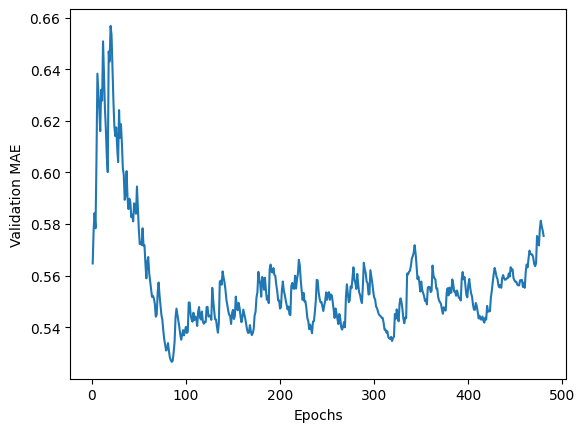

In [16]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else: smoothed_points.append(point)
  return smoothed_points
val_mae_values = history.history['val_mae']
average_mae_history = val_mae_values
smooth_mae_history =smooth_curve(average_mae_history[20:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()